### Урок 4. Непрерывные случайные величины. Функция распределения и плотность распределения вероятностей. Равномерное и нормальное распределение. Центральная предельная теорема

#### Задача 1
О непрерывной равномерно распределенной случайной величине B известно, что ее дисперсия равна 0.2. Можно ли найти правую границу величины B и ее среднее значение зная, что левая граница равна 0.5? Если да, найдите ее.

#### Решение 1

$$D(X) = \frac{(b - a)^2}{12}$$

D(X) = 0.2

a = 0.5

b = ?

mean = ?

In [158]:
from math import sqrt

a = 0.5
dX = 0.2
b = sqrt(12 * dX) + a
b

2.049193338482967

Правая граница b = 2.049193338482967

In [159]:
x_mean = (a + b) / 2
x_mean

1.2745966692414834

среднее значение = 1.2745966692414834

#### Задача 2
Рост взрослого населения города X имеет нормальное распределение, причем, средний рост равен 174 см, а среднее квадратическое отклонение равно 8 см. посчитайте, какова вероятность того, что случайным образом выбранный взрослый человек имеет рост:
1. больше 182 см?
2. больше 190 см?
3. от 166 см до 190 см?
4. от 166 см до 182 см?
5. от 158 см до 190 см?
6. не выше 150 см или не ниже 190 см?
7. не выше 150 см или не ниже 198 см?
8. ниже 166 см?
Задачу можно решить двумя способами: без использования сторонних библиотек (numpy, scipy, pandas и пр.), а затем проверить себя с помощью встроенных функций

#### Решение 2

In [160]:
loc = 174
scale = 8

import numpy as np
from math import erf, pow
from scipy import stats

def cdf_normal(x):
    return (1 + erf((x - loc) / sqrt(2*pow(scale, 2)))) / 2

def more_than(a):
    result = 1 - cdf_normal(a)
    result_stats = 1 - stats.norm.cdf(a, loc, scale)
    print(f'{result} / {result == result_stats}')
    
def less_than(a):
    result = cdf_normal(a)
    result_stats = stats.norm.cdf(a, loc, scale)
    print(f'{result} / {result == result_stats}')
    
def in_range(a, b):
    result = cdf_normal(b) - cdf_normal(a)
    result_stats = stats.norm.cdf(b, loc, scale) - stats.norm.cdf(a, loc, scale)
    print(f'{result} / {result == result_stats}')
    
def not_in_range(a, b):
    result = 1 - (cdf_normal(b) - cdf_normal(a))
    result_stats = 1 - (stats.norm.cdf(b, loc, scale) - stats.norm.cdf(a, loc, scale))
    print(f'{result} / {result == result_stats}')

In [161]:
# больше 182 см
more_than(182)

0.15865525393145707 / True


In [162]:
# больше 190 см
more_than(190)

0.02275013194817921 / True


In [163]:
# от 166 см до 190 см
in_range(166, 190)

0.8185946141203637 / True


In [164]:
# от 166 см до 182 см
in_range(166, 182)

0.6826894921370859 / True


In [165]:
# от 158 см до 190 см
in_range(158, 190)

0.9544997361036416 / True


In [166]:
# не выше 150 см или не ниже 190 см
not_in_range(150, 190)

0.024100029979809312 / True


In [167]:
# не выше 150 см или не ниже 198 см
not_in_range(150, 198)

0.002699796063260207 / True


In [168]:
# ниже 166 см
less_than(166)

0.15865525393145707 / True


#### Задача 3 (Дополнительно)
Коробки с шоколадом упаковываются автоматически. Их средняя масса равна 1.06 кг. Известно, что 5% коробок имеют массу, меньшую 1 кг. Найдите: а) среднее квадратическое отклонение массы коробки, б) процент коробок, имеющих массу больше 1.1 кг.

Подсказка. 1. Можно считать, что распределение массы коробки нормальное. 2. Найдите такое значение scale, для которого значение cdf(x=1, loc=1.06, scale=scale) близко к 0.05. Точности 0.0001 будет достаточно.

#### Решение 3

In [169]:
# Т.к. в задаче коробки с шоколадом, то для начала возьмем D(x) = 0.01кг, следовательно scale = 0.1. Шаг проверки возьмем за 0.01. Проверим значения scale до scale * 2.

In [170]:
start_scale = 0.1
step = 0.01
target = 0.05
scales = np.arange(start_scale, start_scale * 2, step)

In [171]:
scales

array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19])

In [172]:
cdfs = [stats.norm.cdf(x=1, loc=1.06, scale=s) for s in scales]
cdfs

[0.27425311775007344,
 0.2927204672844634,
 0.3085375387259867,
 0.32220616688490555,
 0.3341175708976245,
 0.3445782583896757,
 0.35383023332727603,
 0.3620662701944594,
 0.3694413401817635,
 0.37608115418902677]

In [173]:
# Полученные значения сильно отличаются от 0.05. Найдем start_scale, при котором cdf < 0.05.
while stats.norm.cdf(x=1, loc=1.06, scale=start_scale) >= target:
    start_scale -= step

start_scale

0.030000000000000013

In [174]:
stats.norm.cdf(x=1, loc=1.06, scale=start_scale)

0.022750131948179146

In [175]:
# Генерируем scales и cdfs снова
scales = np.arange(start_scale, start_scale * 2, step)
cdfs = [stats.norm.cdf(x=1, loc=1.06, scale=s) for s in scales]

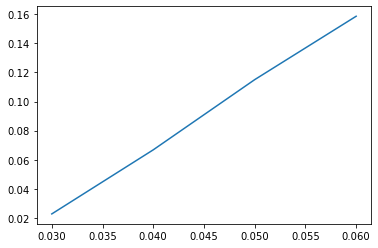

In [176]:
# Построим график распределения вероятности в области найденного start_scale
import matplotlib.pyplot as plt

plt.plot(scales, cdfs)

In [177]:
# Увеличим range для наглядности в 10 раз
scales = np.arange(start_scale, start_scale * 20, step)
cdfs = [stats.norm.cdf(x=1, loc=1.06, scale=s) for s in scales]

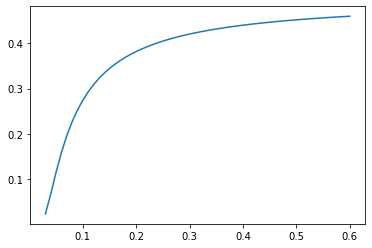

In [178]:
plt.plot(scales, cdfs)

In [179]:
# Полученный график показывает, что направление решения верное, т.к. вероятность не растет бесконечно.

In [180]:
# По предыдущему графику видно, что cdf ~ target при scale ~ 0.035. Исследуем эту область точнее.

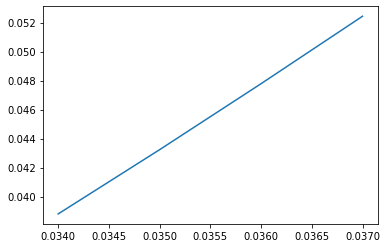

In [181]:
start_scale = 0.034
stop_scale = 0.038
step = 0.001 # уменьшаем шаг
scales = np.arange(start_scale, stop_scale, step)
cdfs = [stats.norm.cdf(x=1, loc=1.06, scale=s) for s in scales]
plt.plot(scales, cdfs)

In [182]:
# Применим цикл

# Требуемая точность 0.0001
precision = 0.0001
c_step = step

# Ищем минимальное отклонение от цели 
deltas = [target - cdf for cdf in cdfs if target - cdf > 0]

# Т.к. график монотонно возрастает, то последнее значение разницы - минимальное
i = len(deltas) - 1
scale = scales[i]

while target - stats.norm.cdf(x=1, loc=1.06, scale=scale) > precision:
    # Уменьшаем step в 10 раз
    c_step *= 0.1
    print(c_step)

    while stats.norm.cdf(x=1, loc=1.06, scale=scale + c_step) < target:
        scale += c_step
        print(scale)
    
print(scale)

0.0001
0.03610000000000001
0.03620000000000001
0.03630000000000001
0.036400000000000016
1e-05
0.03641000000000002
0.03642000000000002
0.036430000000000025
0.03644000000000003
0.03645000000000003
0.036460000000000034
0.03647000000000004
0.03647000000000004


In [183]:
target - stats.norm.cdf(x=1, loc=1.06, scale=scale) < precision

True

#### Ответ a:
среднее квадратическое отклонение массы коробки = 0.03647

In [184]:
# процент коробок, имеющих массу больше 1.1 кг.
1 - stats.norm.cdf(1.1, 1.06, scale)

0.13636618948286938

#### Ответ б:
процент коробок, имеющих массу больше 1.1 кг = 13.6366%